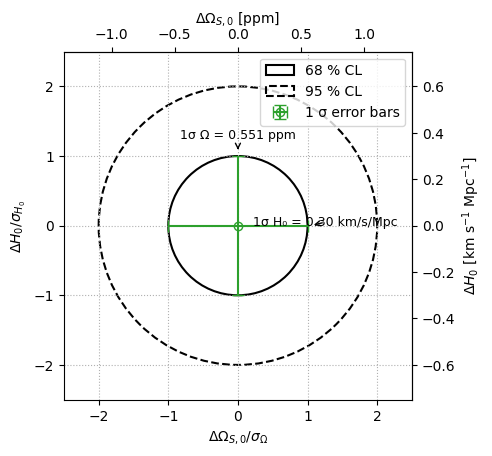

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from numpy.linalg import eigh

# ── 1. Fisher 1-σ errors and correlation (physical units) ─────────────────────
sig_OmS = 5.51e-7          # Ω_S,0   1-σ   (dimensionless)
sig_H0  = 0.30             # H0      1-σ   (km s⁻¹ Mpc⁻¹)
rho     = 0.0              # correlation coefficient

# ── 2. Covariance matrix in physical units ───────────────────────────────────
C = np.array([[sig_OmS**2,           rho*sig_OmS*sig_H0],
              [rho*sig_OmS*sig_H0,   sig_H0**2          ]])

# ── 3. Normalise into unit-σ space & eigendecompose ──────────────────────────
S       = np.diag([1/sig_OmS, 1/sig_H0])   # rescales to Δ/σ axes
C_norm  = S @ C @ S                        # unit-variance covariance
eigval, eigvec = eigh(C_norm)
eigval, eigvec = eigval[::-1], eigvec[:, ::-1]          # λ₁ ≥ λ₂
a1, a2   = np.sqrt(eigval)                # 1-σ semi-axes in Δ/σ space
angle_deg = np.degrees(np.arctan2(eigvec[1,0], eigvec[0,0]))

# ── 4. Physical 1-σ numbers for labels ───────────────────────────────────────
scale_ppm    = 1e6
sigma_O_ppm  = sig_OmS * scale_ppm         # ppm
sigma_H_phys = sig_H0                      # km s⁻¹ Mpc⁻¹

# ── 5. Plot in unit-σ space ──────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(5,5))
for nσ, ls, lab in [(1, '-',  '68 % CL'), (2, '--', '95 % CL')]:
    ax.add_patch(Ellipse(
        xy=(0,0),
        width  = 2*nσ*a1,
        height = 2*nσ*a2,
        angle  = angle_deg,
        fill=False, lw=1.5, ls=ls, label=lab))

# central 1-σ cross-hair
ax.errorbar(0,0,xerr=1,yerr=1,fmt='o',mfc='none',capsize=4,
            color='C2',label='1 σ error bars')

# annotations along eigen-directions
v1, v2 = eigvec[:,0], eigvec[:,1]
ax.annotate(f"1σ Ω = {sigma_O_ppm:.3f} ppm",
            xy=(1.05*a1*v1[0], 1.05*a1*v1[1]),
            xytext=(1.25*a1*v1[0], 1.25*a1*v1[1]),
            arrowprops=dict(arrowstyle='->',lw=1),fontsize=9,ha='center')
ax.annotate(f"1σ H₀ = {sigma_H_phys:.2f} km/s/Mpc",
            xy=(1.05*a2*v2[0], 1.05*a2*v2[1]),
            xytext=(1.25*a2*v2[0], 1.25*a2*v2[1]),
            arrowprops=dict(arrowstyle='->',lw=1),fontsize=9,ha='center')

# dynamic frame: ±2.5 max(a₁,a₂) horizontally, vertically keep equal aspect
margin = 2.5*max(a1,a2)
ax.set_xlim(-margin, margin)
ax.set_ylim(-margin, margin)
ax.set_aspect('equal','box')
ax.set_xlabel(r'$\Delta\Omega_{S,0}/\sigma_{\Omega}$')
ax.set_ylabel(r'$\Delta H_0/\sigma_{H_0}$')
ax.grid(ls=':')
ax.legend(loc='upper right')

# ── 6. Dual physical axes ----------------------------------------------------
secax_x = ax.secondary_xaxis('top',
             functions=(lambda x: x * sigma_O_ppm,
                        lambda xp: xp / sigma_O_ppm))
secax_x.set_xlabel(r'$\Delta\Omega_{S,0}$ [ppm]')
secax_x.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

secax_y = ax.secondary_yaxis('right',
             functions=(lambda y: y * sigma_H_phys,
                        lambda yp: yp / sigma_H_phys))
secax_y.set_ylabel(r'$\Delta H_0$ [km s$^{-1}$ Mpc$^{-1}$]')

# ── 7. save & show -----------------------------------------------------------
plt.tight_layout()
fig.savefig('fig2_forecast_ellipse.pdf', dpi=600)
fig.savefig('fig2_forecast_ellipse.png', dpi=300)
plt.show()
